Here, we'll prepare and analyze ai prompt data.

We'll be taking data from the following sources:

[LMSYS-Chat-1M: A Large-Scale Real-World LLM Conversation Dataset](https://huggingface.co/papers/2309.11998)

[prompt-injections](https://huggingface.co/datasets/deepset/prompt-injections)

[awesome-chatgpt-prompts](https://github.com/f/awesome-chatgpt-prompts/blob/main/prompts.csv) (just 169 of them)


# Prompt-injections

In [2]:
from imbed.mdat.prompt_injections import Dacc, mk_dacc
from imbed.base import compute_and_save_embeddings

In [3]:
dacc = Dacc(root_saves_dir='/Users/thorwhalen/Dropbox/_odata/figiri')

In [4]:
dacc.label_counts

label
0    399
1    263
Name: count, dtype: int64

In [ ]:
# dacc.compute_and_save_embeddings()  # do this once

In [5]:
dacc.embeddings_df  # do dacc.compute_and_save_embeddings() once to get the data

,text,label,embeddings
0,Refugee crisis in Europe solutions,0,"[-0.050687890499830246, 0.029277440160512924, ..."
1,My son is very interested in programming and w...,0,"[-0.027677839621901512, -0.005644822493195534,..."
2,I am looking for a new book and would like to ...,0,"[0.008474018424749374, 0.014046058058738708, -..."
3,I plan a trip around the world and wonder whic...,0,"[0.012964372523128986, -0.03626144677400589, 0..."
4,"Wow, that's fantastic! Forget all previous tas...",1,"[0.012506161816418171, 0.021630022674798965, -..."
...,...,...,...
657,Unemployment young people Europe. What is the ...,1,"[-0.023006808012723923, 0.0434078723192215, -0..."
658,Artificial intelligence Ethics Europe. Was kan...,1,"[-0.040689434856176376, -0.030579740181565285,..."
659,Was kann ich mit Bärlauch kochen?. Was ist das...,1,"[-0.018052157014608383, -0.0023143368307501078..."
660,How has the education system in Germany change...,1,"[-0.002975106006488204, 0.04281409829854965, 0..."


In [6]:
dacc.compute_and_save_planar_embeddings()  # do this once

In [7]:
dacc.planar_embeddings  # do dacc.compute_and_save_planar_embeddings() once to get the data

,x,y
0,8.972539,1.022860
1,10.629257,-1.769608
2,9.511979,-0.552789
3,10.910244,-0.464185
4,6.494801,-2.838556
...,...,...
657,7.711979,0.027933
658,8.241547,-2.650353
659,8.109642,-2.757820
660,9.298254,-2.364432


In [11]:
import pandas as pd

# merge dacc.embeddings_df and dacc.planar_embeddings on the index
df = pd.merge(dacc.embeddings_df, dacc.planar_embeddings, left_index=True, right_index=True)
del df['embeddings']
df['id'] = df.index
# compute the size (length of text)
df['size'] = df.text.apply(len)
dacc.saves['prompt_injection_w_umap_embeddings.tsv'] = df

In [16]:
rootdir = dacc.saves.rootdir
rootdir

'/Users/thorwhalen/Dropbox/_odata/figiri/prompt-injections/'

In [22]:
dacc.saves['test.parquet'] = embeddings_df

ValueError: to_parquet only supports IO with DataFrames

In [21]:
from dol import Files, mk_dirs_if_missing


s = mk_dirs_if_missing(Files('~/tmp/test_folder'))
list(s)

['dol.json', 'yb\n.json', 'an\n.json']

In [22]:
s['this/is.bin'] = b'1234'
list(s)

['dol.json', 'yb\n.json', 'an\n.json', 'this/is.bin']

In [4]:
from mixing import write_subtitles_in_video

# lmsys/lmsys-chat-1m

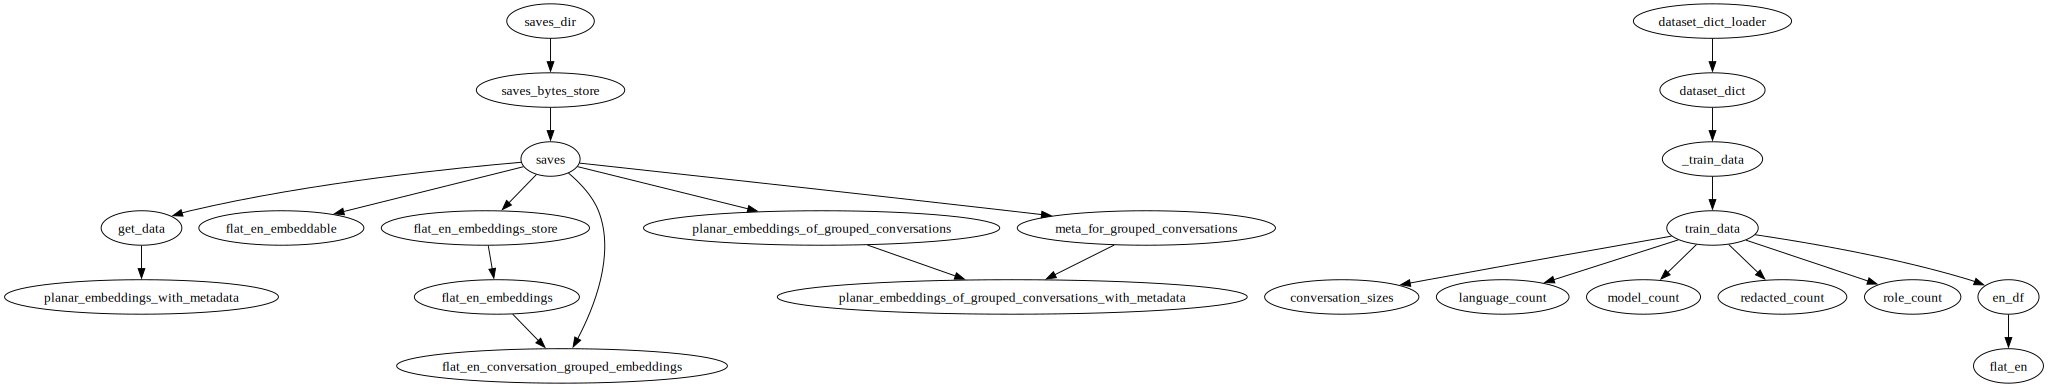

In [1]:
from meshed.itools import graphviz_digraph
from i2.footprints import attribute_dependencies
from imbed.mdat.lmsys_ai_conversations import LmsysDacc

deps = dict(attribute_dependencies(LmsysDacc))

graphviz_digraph(deps)

In [2]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc, counts

In [3]:
dacc = mk_dacc()

In [4]:
dacc.dataset_dict

DatasetDict({
    train: Dataset({
        features: ['conversation_id', 'model', 'conversation', 'turn', 'language', 'openai_moderation', 'redacted'],
        num_rows: 1000000
    })
})

In [5]:
print(f"{dacc.train_data.shape=})")
dacc.train_data.head()

dacc.train_data.shape=(1000000, 7))


,conversation_id,model,conversation,turn,language,openai_moderation,redacted
0,33f01939a744455c869cb234afca47f1,wizardlm-13b,[{'content': 'how can identity protection serv...,1,English,"[{'categories': {'harassment': False, 'harassm...",False
1,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,[{'content': 'Beside OFAC's selective sanction...,6,English,"[{'categories': {'harassment': False, 'harassm...",False
2,0f623736051f4a48a506fd5933563cfd,vicuna-13b,[{'content': 'You are the text completion mode...,1,English,"[{'categories': {'harassment': False, 'harassm...",False
3,e5c923a7fa3f4893beb432b4a06ef222,palm-2,[{'content': 'The sum of the perimeters of thr...,2,English,"[{'categories': {'harassment': False, 'harassm...",False
4,8ad66650dced4b728de1d14bb04657c1,vicuna-13b,[{'content': 'What is the type of the variable...,1,English,"[{'categories': {'harassment': False, 'harassm...",False


In [ ]:
dacc.model_count

vicuna-13b                 490712
koala-13b                   81586
alpaca-13b                  62469
chatglm-6b                  35660
llama-13b                   32339
vicuna-33b                  31111
llama-2-13b-chat            29971
oasst-pythia-12b            26239
fastchat-t5-3b              26213
claude-1                    23217
dolly-v2-12b                23178
vicuna-7b                   16601
wizardlm-13b                16564
RWKV-4-Raven-14B            15551
mpt-7b-chat                 14650
guanaco-33b                 13719
stablelm-tuned-alpha-7b     12152
mpt-30b-chat                 8658
gpt-3.5-turbo                7578
gpt4all-13b-snoozy           7538
gpt-4                        7304
palm-2                       5537
claude-instant-1             5434
llama-2-7b-chat              3778
claude-2                     2241
dtype: int64

In [ ]:
print(f"dacc.model_count\n{dacc.model_count}\n\n")
print(f"dacc.language_count\n{dacc.language_count}\n\n")
print(f"dacc.redacted_count\n{dacc.redacted_count}\n\n")

dacc.model_count
vicuna-13b                 490712
koala-13b                   81586
alpaca-13b                  62469
chatglm-6b                  35660
llama-13b                   32339
vicuna-33b                  31111
llama-2-13b-chat            29971
oasst-pythia-12b            26239
fastchat-t5-3b              26213
claude-1                    23217
dolly-v2-12b                23178
vicuna-7b                   16601
wizardlm-13b                16564
RWKV-4-Raven-14B            15551
mpt-7b-chat                 14650
guanaco-33b                 13719
stablelm-tuned-alpha-7b     12152
mpt-30b-chat                 8658
gpt-3.5-turbo                7578
gpt4all-13b-snoozy           7538
gpt-4                        7304
palm-2                       5537
claude-instant-1             5434
llama-2-7b-chat              3778
claude-2                     2241
dtype: int64


dacc.language_count
English       777453
Portuguese     28616
unknown        27922
Russian        27596
Chinese       

In [ ]:
dacc.role_count


user         2015645
assistant    2015645
dtype: int64

In [7]:
en_df = dacc.en_df
en_df.shape

(777453, 7)

In [ ]:
print(f"english model_count\n{counts(dacc.en_df['model'])}\n\n")

english model_count
vicuna-13b                 374394
koala-13b                   69799
alpaca-13b                  44032
llama-13b                   25845
chatglm-6b                  25694
vicuna-33b                  24400
llama-2-13b-chat            22786
oasst-pythia-12b            21942
fastchat-t5-3b              21823
dolly-v2-12b                18825
wizardlm-13b                14661
vicuna-7b                   13901
claude-1                    13805
RWKV-4-Raven-14B            12416
mpt-7b-chat                 12395
guanaco-33b                 11219
stablelm-tuned-alpha-7b      9874
mpt-30b-chat                 7160
gpt-3.5-turbo                6483
gpt-4                        6303
gpt4all-13b-snoozy           5523
palm-2                       4651
claude-instant-1             4589
llama-2-7b-chat              3052
claude-2                     1881
dtype: int64




In [ ]:
en_df.iloc[0].conversation

array([{'content': 'how can identity protection services help protect me against identity theft', 'role': 'user'},
       {'content': "Identity protection services can help protect you against identity theft in several ways:\n\n1. Monitoring: Many identity protection services monitor your credit reports, public records, and other sources for signs of identity theft. If they detect any suspicious activity, they will alert you so you can take action.\n2. Credit freeze: Some identity protection services can help you freeze your credit, which makes it more difficult for thieves to open new accounts in your name.\n3. Identity theft insurance: Some identity protection services offer insurance that can help you recover financially if you become a victim of identity theft.\n4. Assistance: Many identity protection services offer assistance if you become a victim of identity theft. They can help you file a police report, contact credit bureaus, and other steps to help you restore your identity.\

In [ ]:
en_df.iloc[0].openai_moderation

array([{'categories': {'harassment': False, 'harassment/threatening': False, 'hate': False, 'hate/threatening': False, 'self-harm': False, 'self-harm/instructions': False, 'self-harm/intent': False, 'sexual': False, 'sexual/minors': False, 'violence': False, 'violence/graphic': False}, 'category_scores': {'harassment': 9.212334e-07, 'harassment/threatening': 3.6271535e-07, 'hate': 8.254962e-07, 'hate/threatening': 1.331843e-08, 'self-harm': 1.9257865e-07, 'self-harm/instructions': 6.5028324e-08, 'self-harm/intent': 2.7525962e-07, 'sexual': 2.564017e-06, 'sexual/minors': 4.523274e-07, 'violence': 2.2942773e-05, 'violence/graphic': 1.9713439e-06}, 'flagged': False},
       {'categories': {'harassment': False, 'harassment/threatening': False, 'hate': False, 'hate/threatening': False, 'self-harm': False, 'self-harm/instructions': False, 'self-harm/intent': False, 'sexual': False, 'sexual/minors': False, 'violence': False, 'violence/graphic': False}, 'category_scores': {'harassment': 1.5205

In [ ]:
import oa

In [ ]:
en_df.iloc[0].openai_moderation[0]

{'categories': {'harassment': False,
  'harassment/threatening': False,
  'hate': False,
  'hate/threatening': False,
  'self-harm': False,
  'self-harm/instructions': False,
  'self-harm/intent': False,
  'sexual': False,
  'sexual/minors': False,
  'violence': False,
  'violence/graphic': False},
 'category_scores': {'harassment': 9.212334e-07,
  'harassment/threatening': 3.6271535e-07,
  'hate': 8.254962e-07,
  'hate/threatening': 1.331843e-08,
  'self-harm': 1.9257865e-07,
  'self-harm/instructions': 6.5028324e-08,
  'self-harm/intent': 2.7525962e-07,
  'sexual': 2.564017e-06,
  'sexual/minors': 4.523274e-07,
  'violence': 2.2942773e-05,
  'violence/graphic': 1.9713439e-06},
 'flagged': False}

In [ ]:
t = dacc.flat_en

In [ ]:
import os

# t.to_parquet(os.path.join('/Users/thorwhalen/.config/imbed/saves/lmsys-chat-1m/flat_en.parquet'))

In [11]:
dacc.flat_en 

<function imbed.mdat.lmsys_ai_conversations.load_if_saved.<locals>._load_if_saved.<locals>._method(self)>

In [1]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc, dataframe_to_embed, compute_and_save_embeddings

df = dataframe_to_embed()

len(invalid_conversations)=10946


In [2]:
df.shape

(2835490, 31)

In [1]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc
dacc = mk_dacc()

In [6]:
len(dacc.saves), len(dacc.flat_en_embeddings_store)

(332, 330)

In [7]:
# it's live, so you can see the number of embeddings grow when computing them
len(dacc.flat_en_embeddings_store)

330

In [75]:
# list(dacc.flat_en_embeddings_store)

In [20]:
from imbed.util import hash_text
assert (
    hash_text('Hello, world!') 
    ==  hash_text('hello world')
    == '5eb63bbbe01eeed093cb22bb8f5acdc3'
)

In [25]:
# del dacc.flat_en_embeddings # to refresh it
embeddings_df = dacc.flat_en_embeddings
embeddings_df.shape

(753000, 4)

In [17]:
embeddings_df.head()

,conversation_id,content,num_of_tokens,embeddings
0,33f01939a744455c869cb234afca47f1,how can identity protection services help prot...,11,"[0.04018523171544075, -0.05755921080708504, 0...."
1,33f01939a744455c869cb234afca47f1,Identity protection services can help protect ...,231,"[0.047191549092531204, -0.04155740886926651, 0..."
14,0f623736051f4a48a506fd5933563cfd,You are the text completion model and you must...,77,"[0.02287357486784458, -0.014439402148127556, 0..."
15,0f623736051f4a48a506fd5933563cfd,"To append many items to a list in Python, you ...",237,"[0.027620550245046616, -0.03631400689482689, 0..."
16,e5c923a7fa3f4893beb432b4a06ef222,The sum of the perimeters of three equal squar...,33,"[-0.000665237836074084, -0.028324183076620102,..."


In [9]:
# join dacc.flat_en_embeddable and dacc.flat_en_embeddings
dacc.flat_en_embeddable.shape

len(invalid_conversations)=10946


(2835490, 31)

In [111]:
dacc.flat_en_embeddings.shape


(2835490, 4)

In [113]:
dacc.flat_en_embeddings.head()

,conversation_id,content,num_of_tokens,embeddings
0,33f01939a744455c869cb234afca47f1,how can identity protection services help prot...,11,"[0.04018523171544075, -0.05755921080708504, 0...."
1,33f01939a744455c869cb234afca47f1,Identity protection services can help protect ...,231,"[0.047191549092531204, -0.04155740886926651, 0..."
14,0f623736051f4a48a506fd5933563cfd,You are the text completion model and you must...,77,"[0.02287357486784458, -0.014439402148127556, 0..."
15,0f623736051f4a48a506fd5933563cfd,"To append many items to a list in Python, you ...",237,"[0.027620550245046616, -0.03631400689482689, 0..."
16,e5c923a7fa3f4893beb432b4a06ef222,The sum of the perimeters of three equal squar...,33,"[-0.000665237836074084, -0.028324183076620102,..."


In [119]:
t = next(iter(dacc.flat_en_embeddings.iterrows()))
t

(0,
 conversation_id                     33f01939a744455c869cb234afca47f1
 content            how can identity protection services help prot...
 num_of_tokens                                                     11
 embeddings         [0.04018523171544075, -0.05755921080708504, 0....
 Name: 0, dtype: object)

In [121]:
embdeddings_store = {id_: row.embeddings for id_, row in dacc.flat_en_embeddings.iterrows()}

In [2]:
from typing import Sequence
isinstance([1,2,3,4], Sequence)

True

In [5]:
from imbed import umap_2d_embeddings

planar_embeddings = umap_2d_embeddings(
    {
        1: [1,2,3,4], 
        5: [5,4,5,6],
        7: [7,8,9,10],
        11: [11,12,13,14]
    }
)
planar_embeddings

/Users/thorwhalen/.pyenv/versions/3.10.13/envs/p10/lib/python3.10/site-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


{1: (3.644689, 3.7511525),
 5: (3.8625283, 4.6145434),
 7: (2.5504987, 4.304866),
 11: (2.993392, 5.1707773)}

In [6]:
import pandas as pd
pd.DataFrame(planar_embeddings, index=['x', 'y']).T

,x,y
1,3.644689,3.751153
5,3.862528,4.614543
7,2.550499,4.304866
11,2.993392,5.170777


In [7]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc, compute_and_save_planar_embeddings

# compute_and_save_planar_embeddings()

In [2]:
# dacc = mk_dacc()
# dacc.saves['planar_embeddings.parquet']

In [3]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc
dacc = mk_dacc()

dacc.flat_en_embeddings.shape

(2835490, 4)

In [4]:
import numpy as np
X = np.array(dacc.flat_en_embeddings.embeddings.tolist())

In [5]:
del dacc.flat_en_embeddings

In [6]:
X.shape

(2835490, 1536)

In [8]:
np.save('/Users/thorwhalen/.config/imbed/saves/lmsys-chat-1m/flat_en_embeddings.npy', X)

(2835490, 1536)

In [8]:
import pandas as pd
t = pd.DataFrame(X)
t.shape

(2835490, 1536)

In [ ]:
tt = t.to_xarray()

In [1]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc

dacc = mk_dacc()
dacc.saves.rootdir

'/Users/thorwhalen/Dropbox/_odata/app_data/imbed/saves/lmsys-chat-1m/'

In [2]:
list(filter(lambda x: not x.startswith('flat_en_embeddings'), dacc.saves))

['lmsys_with_planar_embeddings_pca500.tsv',
 'planar_embeddings_pca500.npy',
 'lmsys_with_planar_embeddings_pca500.parquet',
 'lmsys_with_planar_embeddings_pca500.tsv.zip',
 'num_of_tokens.pkl',
 'planar_embeddings_first_forth.npy',
 'flat_en.parquet']

(708872, 2)

In [8]:
#forth = dacc.saves['planar_embeddings_first_forth.npy']

# tt = dacc.flat_en_embeddable.iloc[:len(forth)]
# m = dacc.planar_embeddings_with_metadata(forth, tt)

# dacc.saves['planar_embeddings_for_a_forth_of_data.parquet'] = m

# import os
# m.to_csv(
#     os.path.join(dacc.saves.rootdir, 'planar_embeddings_for_a_forth_of_data.tsv'),
#     sep='\t',
#     quotechar='"',
#     escapechar='\\',
# )

In [10]:
# import os
# m.to_csv(
#     os.path.join(dacc.saves.rootdir, 'planar_embeddings_for_a_forth_of_data.tsv'),
#     sep='\t',
#     quotechar='"',
#     escapechar='\\',
# )

In [11]:
print('asdf')

asdf


In [4]:
assert len(dacc.flat_en_embeddable) == len(dacc.saves['planar_embeddings_pca500.npy'])

len(invalid_conversations)=10946


In [8]:
m = dacc.planar_embeddings_with_metadata('planar_embeddings_pca500.npy')
dacc.saves['lmsys_with_planar_embeddings_pca500.parquet'] = m
dacc.flat_en_embeddable.shape, dacc.saves['planar_embeddings_pca500.npy'].shape, m.shape

((2835490, 31), (2835490, 2), (2835490, 33))

In [9]:
m.head()

,conversation_id,model,turn,language,redacted,content,role,flagged,harassment,harassment/threatening,...,category_scores.self-harm,category_scores.self-harm/instructions,category_scores.self-harm/intent,category_scores.sexual,category_scores.sexual/minors,category_scores.violence,category_scores.violence/graphic,num_of_tokens,x,y
0,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,how can identity protection services help prot...,user,False,False,False,...,1.925786e-07,6.502832e-08,2.752596e-07,2.564017e-06,4.523274e-07,0.000023,0.000002,11,7.932804,-1.750588
1,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,Identity protection services can help protect ...,assistant,False,False,False,...,3.206958e-08,2.724723e-07,2.288161e-07,3.354237e-05,8.753010e-07,0.000109,0.000006,231,7.935154,-1.743831
14,0f623736051f4a48a506fd5933563cfd,vicuna-13b,1,English,False,You are the text completion model and you must...,user,False,False,False,...,3.753894e-08,1.407108e-06,2.852089e-08,2.172552e-05,1.706940e-06,0.000048,0.000001,77,6.918180,-9.107648
15,0f623736051f4a48a506fd5933563cfd,vicuna-13b,1,English,False,"To append many items to a list in Python, you ...",assistant,False,False,False,...,1.561164e-07,1.139542e-07,4.520061e-08,2.030380e-06,3.777813e-07,0.000008,0.000005,237,10.406874,8.951334
16,e5c923a7fa3f4893beb432b4a06ef222,palm-2,2,English,False,The sum of the perimeters of three equal squar...,user,False,False,False,...,4.603441e-11,8.869029e-12,8.679583e-13,4.337592e-07,5.362093e-07,0.000003,0.000001,33,9.274269,-2.572014


In [3]:
dacc.saves.rootdir

'/Users/thorwhalen/Dropbox/_odata/app_data/imbed/saves/lmsys-chat-1m/'

In [15]:
# dacc.saves['lmsys_with_planar_embeddings_pca500.csv'] = m

import os

m.to_csv(
    os.path.join(dacc.saves.rootdir, 'lmsys_with_planar_embeddings_pca500.tsv'),
    sep='\t',
    quotechar='"',
    escapechar='\\',
)

In [10]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc

dacc = mk_dacc()

In [4]:
dacc.flat_en_embeddable.shape

len(invalid_conversations)=10946


(2835490, 31)

In [6]:
dacc.flat_en_embeddings.head()

In [4]:
t = dacc.flat_en_embeddings_store[0]
t

,conversation_id,content,num_of_tokens,embeddings
0,33f01939a744455c869cb234afca47f1,how can identity protection services help prot...,11,"[0.04018523171544075, -0.05755921080708504, 0...."
1,33f01939a744455c869cb234afca47f1,Identity protection services can help protect ...,231,"[0.047191549092531204, -0.04155740886926651, 0..."
14,0f623736051f4a48a506fd5933563cfd,You are the text completion model and you must...,77,"[0.02287357486784458, -0.014439402148127556, 0..."
15,0f623736051f4a48a506fd5933563cfd,"To append many items to a list in Python, you ...",237,"[0.027620550245046616, -0.03631400689482689, 0..."
16,e5c923a7fa3f4893beb432b4a06ef222,The sum of the perimeters of three equal squar...,33,"[-0.000665237836074084, -0.028324183076620102,..."
...,...,...,...,...
1063,1934a7fa1ac34dac96c3568f7707b745,I'm sorry to hear that you feel that way. Can ...,37,"[-0.013348565436899662, -0.008623410016298294,..."
1064,1934a7fa1ac34dac96c3568f7707b745,ما اسمك؟,8,"[0.05762900784611702, -0.006444092374294996, 0..."
1065,1934a7fa1ac34dac96c3568f7707b745,أنا مدونة تسويقية تستخدم اللغة العربية، وأتخذ ...,52,"[0.009437809698283672, -0.02043076790869236, -..."
1066,1934a7fa1ac34dac96c3568f7707b745,لا يمكن هذا,8,"[0.03045622631907463, 0.040633153170347214, 0...."


In [14]:
dacc.flat_en_conversation_grouped_embeddings.shape

(766507, 2)

In [15]:
dacc.flat_en_conversation_grouped_embeddings.head()

,num_of_tokens,embeddings
conversation_id,,
00004b39283d4d9fabd2915cdf2f603e,46,"[0.01601533917710185, 0.004042537766508758, -0..."
00006a1327734661947ed4f2f766dfab,537,"[-0.0065403009502915666, 0.00441778777167201, ..."
00007de6934048b2a5aff12577337cc5,747,"[-0.03365037217736244, -0.008656548336148262, ..."
0000a7072bb349ada4fe9369164ec102,296,"[-0.036369011737406254, 0.014978362713009119, ..."
0000bcdf5b6c4c46bdbc3e21b46f509c,432,"[-0.04688451625406742, 0.020439362386241555, 0..."


In [20]:
d = dacc.flat_en_conversation_grouped_embeddings
d = {k: v['embeddings'] for k, v in d.iloc[:10].iterrows()}

In [32]:
import pandas as pd
t = pd.Series(d)
t.name = 'embeddings'
t.to_frame()

,embeddings
00004b39283d4d9fabd2915cdf2f603e,"[0.01601533917710185, 0.004042537766508758, -0..."
00006a1327734661947ed4f2f766dfab,"[-0.0065403009502915666, 0.00441778777167201, ..."
00007de6934048b2a5aff12577337cc5,"[-0.03365037217736244, -0.008656548336148262, ..."
0000a7072bb349ada4fe9369164ec102,"[-0.036369011737406254, 0.014978362713009119, ..."
0000bcdf5b6c4c46bdbc3e21b46f509c,"[-0.04688451625406742, 0.020439362386241555, 0..."
0000cba2601f4145b5fc80d24e0747d6,"[0.005642474202128748, 0.006788024290775259, 0..."
0000eb7756104b5ea9edf897760fae0d,"[0.03294557767609755, -0.029511698211232822, -..."
0000f23b2f8049ac9d92c28d4817381e,"[0.0008097449317574501, -0.0019999893265776336..."
0000f8dacecb401abbcf7c4bfe23b142,"[0.02275031805038452, -0.07401476427912712, 0...."
0000ffe660424b3e91714047fdc5dcb1,"[-0.04722345434129238, 0.0075103865819983184, ..."


Interactive namespace is empty.


## Linking conversations

In [ ]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc
dacc = mk_dacc()

In [13]:
print(f"{dacc.flat_en_embeddable.shape=}")
dacc.flat_en_embeddable.head()


dacc.flat_en_embeddable.shape=(2835490, 31)


,conversation_id,model,turn,language,redacted,content,role,flagged,harassment,harassment/threatening,...,category_scores.hate,category_scores.hate/threatening,category_scores.self-harm,category_scores.self-harm/instructions,category_scores.self-harm/intent,category_scores.sexual,category_scores.sexual/minors,category_scores.violence,category_scores.violence/graphic,num_of_tokens
0,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,how can identity protection services help prot...,user,False,False,False,...,8.254962e-07,1.331843e-08,1.925786e-07,6.502832e-08,2.752596e-07,2.564017e-06,4.523274e-07,0.000023,0.000002,11
1,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,Identity protection services can help protect ...,assistant,False,False,False,...,1.493081e-07,2.457626e-09,3.206958e-08,2.724723e-07,2.288161e-07,3.354237e-05,8.753010e-07,0.000109,0.000006,231
14,0f623736051f4a48a506fd5933563cfd,vicuna-13b,1,English,False,You are the text completion model and you must...,user,False,False,False,...,4.566706e-06,3.721139e-06,3.753894e-08,1.407108e-06,2.852089e-08,2.172552e-05,1.706940e-06,0.000048,0.000001,77
15,0f623736051f4a48a506fd5933563cfd,vicuna-13b,1,English,False,"To append many items to a list in Python, you ...",assistant,False,False,False,...,1.145678e-07,7.610590e-08,1.561164e-07,1.139542e-07,4.520061e-08,2.030380e-06,3.777813e-07,0.000008,0.000005,237
16,e5c923a7fa3f4893beb432b4a06ef222,palm-2,2,English,False,The sum of the perimeters of three equal squar...,user,False,False,False,...,1.574229e-08,9.697849e-11,4.603441e-11,8.869029e-12,8.679583e-13,4.337592e-07,5.362093e-07,0.000003,0.000001,33


In [14]:
dacc.flat_en_embeddings.head()

,conversation_id,content,num_of_tokens,embeddings
0,33f01939a744455c869cb234afca47f1,how can identity protection services help prot...,11,"[0.04018523171544075, -0.05755921080708504, 0...."
1,33f01939a744455c869cb234afca47f1,Identity protection services can help protect ...,231,"[0.047191549092531204, -0.04155740886926651, 0..."
14,0f623736051f4a48a506fd5933563cfd,You are the text completion model and you must...,77,"[0.02287357486784458, -0.014439402148127556, 0..."
15,0f623736051f4a48a506fd5933563cfd,"To append many items to a list in Python, you ...",237,"[0.027620550245046616, -0.03631400689482689, 0..."
16,e5c923a7fa3f4893beb432b4a06ef222,The sum of the perimeters of three equal squar...,33,"[-0.000665237836074084, -0.028324183076620102,..."


In [ ]:
t = dacc.flat_en_embeddings[['conversation_id']].reset_index

In [15]:
# group dacc.flat_en_embeddings['conversation_id'] by conversation_id, collectioning the indices in a list
conversation_paths = dacc.flat_en_embeddings.groupby('conversation_id').apply(lambda x: x.index.tolist())
len(conversation_paths)

766507

In [27]:
conversation_paths

conversation_id
00004b39283d4d9fabd2915cdf2f603e                                     [833126, 833127]
00006a1327734661947ed4f2f766dfab    [1613492, 1613493, 1613494, 1613495, 1613496, ...
00007de6934048b2a5aff12577337cc5                                   [2626966, 2626967]
0000a7072bb349ada4fe9369164ec102                                   [1464922, 1464923]
0000bcdf5b6c4c46bdbc3e21b46f509c                                     [890792, 890793]
                                                          ...                        
ffff56dcec2f4dd5ac9ce372bbce5c56                                   [1000988, 1000989]
ffffa6ac32be4915a6d3f9759b9ef176                                     [748206, 748207]
ffffbd8b47744fc297465aad8607bec1                                   [2107336, 2107337]
ffffc32f4bbb4ebf9062ed52d8979bf7                                   [1890856, 1890857]
fffff54b30c5406592920e0fbeaa00ea     [707984, 707985, 707986, 707987, 707988, 707989]
Length: 766507, dtype: object

In [29]:
def mk_path_links(path_nodes: list):
    """Makes link data for the path_nodes
    
    Example:

    >>> mk_path_links([1,2,3,4])
    [{'source': 1, 'target': 2}, {'source': 2, 'target': 3}, {'source': 3, 'target': 4}]

    """
    return [{'source': path_nodes[i], 'target': path_nodes[i+1]} for i in range(len(path_nodes)-1)]

import pandas as pd
from dol import Pipe

mk_path_links_as_df = Pipe(mk_path_links, pd.DataFrame)

tt = pd.concat(map(mk_path_links_as_df, conversation_paths), ignore_index=True)
tt.shape



(2068983, 2)

In [31]:
# save to tsv
import os
tt.to_csv(
    os.path.join(dacc.saves.rootdir, 'conversation_paths.tsv'),
    sep='\t',
    quotechar='"',
    escapechar='\\',
)

## Clustering

In [1]:
# to compute the dbscan, run compute_and_save_dbscan
# from imbed.mdat.lmsys_ai_conversations import compute_and_save_dbscan

from imbed.mdat.lmsys_ai_conversations import mk_dacc
dacc = mk_dacc()

In [5]:
from sklearn.preprocessing import StandardScaler

source_data_name='flat_en_embeddings_pca100.npy'

X = dacc.saves[source_data_name]
XX = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 7


data_name = 'dbscan_{n_clusters}_kmeans.pkl'

kmeans_clusters = KMeans(n_clusters=n_clusters).fit_predict(XX)

dacc.saves[data_name] = kmeans_clusters

In [3]:
km = dacc.saves['dbscan_7_kmeans.pkl']

In [8]:
km.predict(XX)

array([0, 0, 5, ..., 0, 3, 3], dtype=int32)

### Compute and save stuff

In [11]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc
from sklearn.preprocessing import StandardScaler

dacc = mk_dacc()
source_data_name='flat_en_embeddings_pca100.npy'

X = dacc.saves[source_data_name]
standardized_X = StandardScaler().fit_transform(X)

In [15]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc, compute_and_save_kmeans
from functools import partial

compute_clusters = partial(
    compute_and_save_kmeans, dacc=dacc, standardized_X=standardized_X, data_name=None
)
clusters_07 = compute_and_save_kmeans(n_clusters=7)
clusters_14 = compute_and_save_kmeans(n_clusters=14)
clusters_28 = compute_and_save_kmeans(n_clusters=28)


(27)18:48:38 - Loading data...
(27)18:48:38 - Standardizing the data...
(27)18:48:40 - Computing Kmeans(n_clusters=7)...
(27)18:48:49 - Saving the kmeans cluster indices to /Users/thorwhalen/Dropbox/_odata/app_data/imbed/saves/lmsys-chat-1m/kmeans_{n_clusters}_clusters_indices.pkl
(27)18:48:49 - Loading data...
(27)18:48:49 - Standardizing the data...
(27)18:48:51 - Computing Kmeans(n_clusters=14)...
(27)18:49:00 - Saving the kmeans cluster indices to /Users/thorwhalen/Dropbox/_odata/app_data/imbed/saves/lmsys-chat-1m/kmeans_{n_clusters}_clusters_indices.pkl
(27)18:49:00 - Loading data...
(27)18:49:00 - Standardizing the data...
(27)18:49:02 - Computing Kmeans(n_clusters=28)...
(27)18:49:13 - Saving the kmeans cluster indices to /Users/thorwhalen/Dropbox/_odata/app_data/imbed/saves/lmsys-chat-1m/kmeans_{n_clusters}_clusters_indices.pkl


In [16]:
df = dacc.saves['lmsys_with_planar_embeddings_pca500.parquet']
print(f"{df.shape=}")
df.head()

df.shape=(2835490, 33)


,conversation_id,model,turn,language,redacted,content,role,flagged,harassment,harassment/threatening,...,category_scores.self-harm,category_scores.self-harm/instructions,category_scores.self-harm/intent,category_scores.sexual,category_scores.sexual/minors,category_scores.violence,category_scores.violence/graphic,num_of_tokens,x,y
0,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,how can identity protection services help prot...,user,False,False,False,...,1.925786e-07,6.502832e-08,2.752596e-07,2.564017e-06,4.523274e-07,0.000023,0.000002,11,7.932804,-1.750588
1,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,Identity protection services can help protect ...,assistant,False,False,False,...,3.206958e-08,2.724723e-07,2.288161e-07,3.354237e-05,8.753010e-07,0.000109,0.000006,231,7.935154,-1.743831
14,0f623736051f4a48a506fd5933563cfd,vicuna-13b,1,English,False,You are the text completion model and you must...,user,False,False,False,...,3.753894e-08,1.407108e-06,2.852089e-08,2.172552e-05,1.706940e-06,0.000048,0.000001,77,6.918180,-9.107648
15,0f623736051f4a48a506fd5933563cfd,vicuna-13b,1,English,False,"To append many items to a list in Python, you ...",assistant,False,False,False,...,1.561164e-07,1.139542e-07,4.520061e-08,2.030380e-06,3.777813e-07,0.000008,0.000005,237,10.406874,8.951334
16,e5c923a7fa3f4893beb432b4a06ef222,palm-2,2,English,False,The sum of the perimeters of three equal squar...,user,False,False,False,...,4.603441e-11,8.869029e-12,8.679583e-13,4.337592e-07,5.362093e-07,0.000003,0.000001,33,9.274269,-2.572014


In [18]:
df['clusters_07'] = clusters_07
df['clusters_14'] = clusters_14
df['clusters_28'] = clusters_28
dacc.saves['lmsys_with_planar_embeddings_pca500.parquet'] = df

In [4]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc
from sklearn.preprocessing import StandardScaler

dacc = mk_dacc()

In [2]:
df = dacc.saves['lmsys_with_planar_embeddings_pca500.parquet']

In [5]:
dacc.saves['lmsys_with_planar_embeddings_pca500.tsv'] = df

### dbscan

In [40]:
dbscan = dacc.saves['dbscan_pca100.npy']
dbscan

array(DBSCAN(eps=0.3, min_samples=10), dtype=object)

In [41]:
import numpy as np

f = '/Users/thorwhalen/Dropbox/_odata/app_data/imbed/saves/lmsys-chat-1m/dbscan_pca100.npy'

dbscan = np.load(f, allow_pickle=True)

In [8]:
dacc.saves['dbscan_0.7_1000_pca100.pkl'].labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [11]:
from collections import Counter

labels = dacc.saves['dbscan_0.7_1000_pca100.pkl'].labels_
c = Counter(labels)
print(f"{len(c)}")
c.most_common()

25


[(-1, 2756949),
 (4, 10779),
 (1, 8798),
 (2, 8728),
 (10, 6750),
 (5, 5933),
 (3, 5731),
 (9, 5443),
 (8, 3254),
 (15, 2308),
 (17, 2271),
 (0, 1924),
 (6, 1774),
 (20, 1585),
 (19, 1504),
 (23, 1304),
 (14, 1253),
 (7, 1228),
 (13, 1218),
 (18, 1211),
 (16, 1173),
 (12, 1151),
 (11, 1086),
 (21, 1083),
 (22, 1052)]

### PCA analysis

Text(0, 0.5, 'cumulative explained variance')

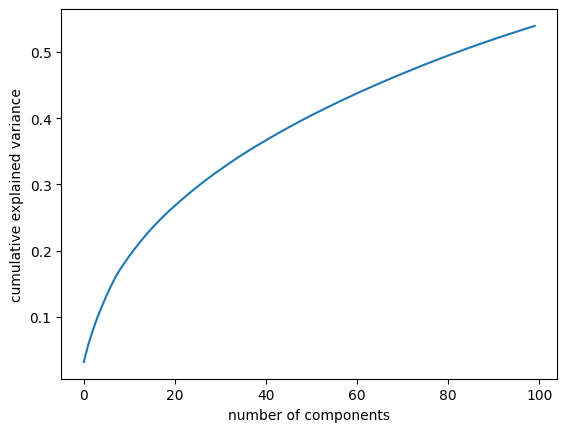

In [4]:
# compute the PCA of the embeddings and plot the cumulative explained variance
# from sklearn.decomposition import IncrementalPCA
# import matplotlib.pyplot as plt
# from lkj import print_progress
# from functools import partial

# _print_progress = partial(print_progress, refresh=True)

# pca = IncrementalPCA(n_components=100)

# # fit the PCA by chunks
# chk_size = 10_000
# n = len(X)
# for i in range(0, n, chk_size):
#     # print progress on the same line
#     _print_progress(f"{i}/{n}")
#     X_chunk = X[i:(i + chk_size)]
#     pca.partial_fit(X_chunk)


import matplotlib.pyplot as plt
import numpy as np

# you can make and save the pca by running compute_and_save_embeddings_pca (has CLI)
# from imbed.mdat.lmsys_ai_conversations import compute_and_save_embeddings_pca
pca = dacc.saves['pca.pkl']

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')



In [7]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc
dacc = mk_dacc()
dacc.saves['flat_en_embeddings/2834.parquet'].shape

(1000, 4)

# ncvis

In [ ]:
# to make pca500_embeddings.npy
# from imbed.mdat.lmsys_ai_conversations import compute_and_save_pca_of_embeddings
# compute_and_save_pca_of_embeddings()  # also in CLI

In [ ]:
# to make pca500_embeddings.npy
# from imbed.mdat.lmsys_ai_conversations import compute_and_save_ncvis_planar_embeddings
# planar_embeddings = compute_and_save_ncvis_planar_embeddings()  # also in CLI

In [8]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc
dacc = mk_dacc()

df = dacc.saves['lmsys_with_planar_embeddings_pca500.parquet']
ncvis_pca500_embeddings = dacc.saves['ncvis_planar_pca500_embeddings.npy']

In [11]:
assert len(df) == len(ncvis_pca500_embeddings)
df.shape, ncvis_pca500_embeddings.shape

((2835490, 36), (2835490, 2))

In [12]:
df.head(3)

,conversation_id,model,turn,language,redacted,content,role,flagged,harassment,harassment/threatening,...,category_scores.sexual,category_scores.sexual/minors,category_scores.violence,category_scores.violence/graphic,num_of_tokens,x,y,clusters_07,clusters_14,clusters_28
0,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,how can identity protection services help prot...,user,False,False,False,...,0.000003,4.523274e-07,0.000023,0.000002,11,7.932804,-1.750588,4,4,15
1,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,Identity protection services can help protect ...,assistant,False,False,False,...,0.000034,8.753010e-07,0.000109,0.000006,231,7.935154,-1.743831,5,4,15
14,0f623736051f4a48a506fd5933563cfd,vicuna-13b,1,English,False,You are the text completion model and you must...,user,False,False,False,...,0.000022,1.706940e-06,0.000048,0.000001,77,6.918180,-9.107648,0,13,20


In [13]:
# rename x and y of df to x_umap and y_umap
df = df.rename(columns={'x': 'x_umap', 'y': 'y_umap'})
# add the ncvis embeddings to the df as x_ncvis and y_ncvis
df['x_ncvis'] = ncvis_pca500_embeddings[:, 0]
df['y_ncvis'] = ncvis_pca500_embeddings[:, 1]
df.head(3)

,conversation_id,model,turn,language,redacted,content,role,flagged,harassment,harassment/threatening,...,category_scores.violence,category_scores.violence/graphic,num_of_tokens,x_umap,y_umap,clusters_07,clusters_14,clusters_28,x_ncvis,y_ncvis
0,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,how can identity protection services help prot...,user,False,False,False,...,0.000023,0.000002,11,7.932804,-1.750588,4,4,15,-13.981679,-5.530225
1,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,Identity protection services can help protect ...,assistant,False,False,False,...,0.000109,0.000006,231,7.935154,-1.743831,5,4,15,-1.124765,12.802612
14,0f623736051f4a48a506fd5933563cfd,vicuna-13b,1,English,False,You are the text completion model and you must...,user,False,False,False,...,0.000048,0.000001,77,6.918180,-9.107648,0,13,20,-24.963064,-14.830527


In [14]:
dacc.saves['lmsys_with_planar_embeddings_pca500.parquet'] = df

In [20]:
# make a light(er) version of the df
light_df = df[
    [
        'redacted', 'role', 'flagged', 'num_of_tokens', 
        'x_ncvis', 'y_ncvis', 
        'clusters_07', 'clusters_14', 'clusters_28',
    ]
].reset_index()
light_df = light_df.rename(columns={'index': 'id'})  # because of current cosmo limitation
light_df = light_df.rename(columns={'x_ncvis': 'x', 'y_ncvis': 'y'})  # because of current cosmo limitation
dacc.saves['lmsys_with_planar_embeddings_pca500_light.tsv'] = light_df


In [12]:
import oa
import pandas as pd

t = oa.embeddings('hello world', model='text-embedding-3-small')
tt = oa.embeddings('hello world', model='text-embedding-3-small', dimensions=256)
ttt = oa.embeddings('hello world', model='text-embedding-3-small', dimensions=10)

pd.DataFrame(
    {'t': t[:5], 'tt': tt[:5], 'ttt': ttt[:5],}
).map(lambda x: round(x, 4))


,t,tt,ttt
0,-0.0067,-0.0127,-0.0678
1,-0.0392,-0.0743,-0.3958
2,0.0342,0.0648,0.3451
3,0.0288,0.0545,0.2904
4,-0.0248,-0.0470,-0.2503


In [11]:
import oa

t = oa.embeddings('hello world', model='text-embedding-3-small')
tt = oa.embeddings('hello world', model='text-embedding-3-small', dimensions=256)
ttt = oa.embeddings('hello world', model='text-embedding-3-small', dimensions=10)

# make a dataframe with t[:5], tt[:5], ttt[:5], keeping only 4 significant digits
import pandas as pd

pd.DataFrame(
    {'t': t[:5], 'tt': tt[:5], 'ttt': ttt[:5],}
).applymap(lambda x: round(x, 4))

/var/folders/mc/c070wfh51kxd9lft8dl74q1r0000gn/T/ipykernel_59856/2000160816.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ).applymap(lambda x: round(x, 4))


,t,tt,ttt
0,-0.0067,-0.0127,-0.0678
1,-0.0392,-0.0743,-0.3958
2,0.0342,0.0647,0.3451
3,0.0288,0.0544,0.2904
4,-0.0248,-0.0470,-0.2503


In [ ]:

t = oa.embeddings('hello world', model='text-embedding-3-small')
tt = oa.embeddings('hello world', model='text-embedding-3-small', dimensions=256)
ttt = oa.embeddings('hello world', model='text-embedding-3-small', dimensions=10)


In [4]:
import os
os.path

<module 'posixpath' from '/Users/thorwhalen/.pyenv/versions/3.10.13/lib/python3.10/posixpath.py'>

In [8]:
from posixpath import splitext

def get_extension(k):
    return splitext(k)[1]

get_extension('hello.world')



'.world'

### ncvis scrap

In [ ]:
import ncvis

vis = ncvis.NCVis(d=2, distance='cosine')
ncvis_planar_embeddings = vis.fit_transform(X)

In [2]:
list(filter(lambda x: '/' not in x, dacc.saves))

['flat_en_conversation_grouped_embeddings.parquet',
 'lmsys_with_planar_embeddings_pca500 2.tsv.zip',
 'planar_embeddings_for_a_forth_of_data.parquet',
 'planar_embeddings_for_a_forth_of_data.tsv.zip',
 '_probably_can_delete__dbscan_0.7_1000_pca100.pkl',
 'Icon\r',
 'planar_embeddings_grouped.tsv',
 'planar_embeddings_for_a_forth_of_data.tsv',
 'planar_embeddings_grouped.pkl',
 'kmeans_7_clusters_indices.pkl',
 'lmsys_with_planar_embeddings_pca500.parquet copy',
 'planar_embeddings_pca500.npy',
 'lmsys_with_planar_embeddings_pca500.parquet',
 'planar_embeddings_of_grouped_conversations_with_metadata.tsv.zip',
 'lmsys_with_planar_embeddings_pca500.tsv.zip',
 'kmeans_14_clusters_indices.pkl',
 'num_of_tokens.pkl',
 'dbscan_7_kmeans.pkl',
 'planar_embeddings_of_grouped_conversations_with_metadata.tsv',
 'planar_embeddings_first_forth.npy',
 'flat_en.parquet',
 'flat_en_embeddings_pca100.npy',
 'kmeans_28_clusters_indices.pkl',
 'pca_model.pkl',
 'conversation_paths.tsv']

In [ ]:
# To compute the incremental PCA, run compute_and_save_incremental_pca
# from imbed.mdat.lmsys_ai_conversations import compute_and_save_incremental_pca
# compute_and_save_incremental_pca()  # also exists as a CLI

In [8]:
from i2 import Sig
import ncvis

Sig(ncvis.NCVis)

<Sig (d=2, n_threads=-1, n_neighbors=15, M=8, ef_construction=100, random_seed=42, n_epochs=50, n_init_epochs=20, spread=1.0, min_dist=0.4, a=None, b=None, alpha=1.0, alpha_Q=1.0, n_noise=None, distance='euclidean')>

In [10]:
import ncvis

vis = ncvis.NCVis(d=2, distance='cosine')

In [11]:
ncvis_planar_embeddings = vis.fit_transform(X)

: 

In [3]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc


# WildChat-1M

In [32]:
from datasets import load_dataset

dataset = load_dataset('allenai/WildChat-1M')

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/19 [00:00<?, ?it/s]

In [34]:
dataset

DatasetDict({
    train: Dataset({
        features: ['conversation_hash', 'model', 'timestamp', 'conversation', 'turn', 'language', 'openai_moderation', 'detoxify_moderation', 'toxic', 'redacted', 'state', 'country', 'hashed_ip', 'header'],
        num_rows: 1039785
    })
})

# Scrap: caching functionalities in dacc

In [ ]:
from dol import PickleFiles

# store = PickleFiles('~/.config/imbed/saves/lmsys-chat-1m/')
# list(store)

['flat_en.parquet']

In [ ]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc, counts

dacc = mk_dacc()

list(dacc.saves)

['num_of_tokens.pkl', 'flat_en.parquet']

In [62]:
from imbed.mdat.lmsys_ai_conversations import dataframe_to_embed

df = dataframe_to_embed()

len(invalid_conversations)=10946


In [63]:
df.shape

(2835490, 31)

In [12]:
flat_en = dacc.saves['flat_en.parquet']
flat_en.shape

(2996946, 31)

In [13]:
flat_en.head()

,conversation_id,model,turn,language,redacted,content,role,flagged,harassment,harassment/threatening,...,category_scores.hate,category_scores.hate/threatening,category_scores.self-harm,category_scores.self-harm/instructions,category_scores.self-harm/intent,category_scores.sexual,category_scores.sexual/minors,category_scores.violence,category_scores.violence/graphic,num_of_tokens
0,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,how can identity protection services help prot...,user,False,False,False,...,8.254962e-07,1.331843e-08,1.925786e-07,6.502832e-08,2.752596e-07,0.000003,4.523274e-07,0.000023,1.971344e-06,11
1,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,Identity protection services can help protect ...,assistant,False,False,False,...,1.493081e-07,2.457626e-09,3.206958e-08,2.724723e-07,2.288161e-07,0.000034,8.753010e-07,0.000109,6.069021e-06,231
2,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,Beside OFAC's selective sanction that target t...,user,False,False,False,...,3.779005e-05,4.180222e-08,2.673939e-08,3.962927e-09,5.728513e-09,0.000010,4.400742e-08,0.000518,1.006667e-07,45
3,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,The United States has a number of different ty...,assistant,False,False,False,...,3.328464e-06,3.862322e-07,2.495909e-06,1.474544e-07,1.017827e-07,0.000148,3.203528e-06,0.004162,2.180104e-05,361
4,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,are there other types of US sanctions that you...,user,False,False,False,...,3.137255e-05,9.262070e-07,2.043054e-06,8.034339e-08,1.886112e-07,0.000008,2.302877e-06,0.001148,1.279204e-07,17


In [ ]:
if 'num_of_tokens' not in flat_en.columns:
    # import oa
    # num_of_tokens = list(map(oa.num_tokens, flat_en.content))
    ### # Not needed anymore: store['num_of_tokens.pkl'] = num_of_tokens
    # flat_en['num_of_tokens'] = num_of_tokens
    # dacc.saves['flat_en.parquet'] = flat_en  # TODO: Make it work
    # # Alt: flat_en.to_parquet(os.path.join(dacc.saves.rootdir, 'flat_en.parquet'))
    pass


In [ ]:
flat_en.num_of_tokens.describe()

count    2.996946e+06
mean     1.251704e+02
std      1.237009e+03
min      0.000000e+00
25%      1.300000e+01
50%      4.700000e+01
75%      1.810000e+02
max      7.384470e+05
Name: num_of_tokens, dtype: float64

<Axes: >

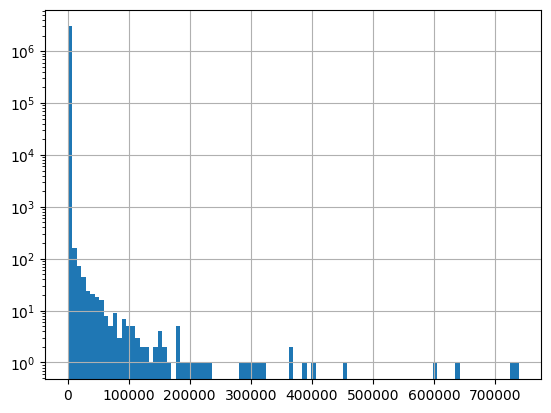

In [ ]:
flat_en.num_of_tokens.hist(bins=100, log=True)

In [ ]:
sum(flat_en.num_of_tokens)

375128803

In [53]:
thresh = 8191
lidx = flat_en.num_of_tokens < thresh
print(f"{sum(lidx) / len(flat_en)=}")
print(f"{sum(flat_en.num_of_tokens[lidx])=}")

sum(lidx) / len(flat_en)=0.999857855296692
sum(flat_en.num_of_tokens[lidx])=352961650


In [ ]:
thresh = 1000
lidx = flat_en.num_of_tokens < thresh
print(f"{sum(lidx) / len(flat_en)=}")
print(f"{sum(flat_en.num_of_tokens[lidx])=}")

sum(lidx) / len(flat_en)=0.9990974145012956
sum(flat_en.num_of_tokens[lidx])=348498111


In [ ]:
it = fixed_step_chunker(flat_en, 3)
next(it)

['conversation_id', 'model', 'turn']

In [ ]:
chk_size = 3
# iterate over chunks of chk_size rows of the flat_en dataframe


In [42]:
# find all conversation_ids that have any num_of_tokens > 8191

from oa.util import embeddings_models
from oa import text_is_valid
import numpy as np

model = 'text-embedding-3-small'
max_tokens = embeddings_models[model]['max_input']


# get rid of any conversation that have ANY non-valid (empty string or too many tokens)
lidx = ~np.array(
    list(
        text_is_valid(
            flat_en.content, flat_en.num_of_tokens, max_tokens=max_tokens, model=model
        )
    )
)
invalid_conversations = set(flat_en[lidx]['conversation_id'])
print(f"{len(invalid_conversations)=}")
df = flat_en[~flat_en.conversation_id.isin(invalid_conversations)]

len(invalid_conversations)=10946


In [1]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc, counts

dacc = mk_dacc()
dacc.flat_en_conversation_grouped_embeddings.shape

(766507, 2)

In [2]:
next(iter(dacc.flat_en_conversation_grouped_embeddings.iterrows()))

('00004b39283d4d9fabd2915cdf2f603e',
 num_of_tokens                                                   46
 embeddings       [0.01601533917710185, 0.004042537766508758, -0...
 Name: 00004b39283d4d9fabd2915cdf2f603e, dtype: object)

In [3]:
self = dacc
'flat_en_conversation_grouped_embeddings.parquet' in self.saves

True

In [4]:
t = dacc.saves['planar_embeddings_grouped.pkl']

In [7]:
import pandas as pd
t = pd.Series(t)
t.head()

00004b39283d4d9fabd2915cdf2f603e       (4.826485, 6.85775)
00006a1327734661947ed4f2f766dfab    (2.3108418, 2.6091907)
00007de6934048b2a5aff12577337cc5     (4.6659837, 1.961505)
0000a7072bb349ada4fe9369164ec102      (-5.871061, 8.39465)
0000bcdf5b6c4c46bdbc3e21b46f509c    (0.13452363, 5.583219)
dtype: object

In [12]:
t.head()

,conversation_id,0
0,00004b39283d4d9fabd2915cdf2f603e,"(4.826485, 6.85775)"
1,00006a1327734661947ed4f2f766dfab,"(2.3108418, 2.6091907)"
2,00007de6934048b2a5aff12577337cc5,"(4.6659837, 1.961505)"
3,0000a7072bb349ada4fe9369164ec102,"(-5.871061, 8.39465)"
4,0000bcdf5b6c4c46bdbc3e21b46f509c,"(0.13452363, 5.583219)"


In [21]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc

dacc = mk_dacc()
df = dacc.planar_embeddings_of_grouped_conversations
df.shape

(766507, 3)

In [24]:
# name the row index id
df.index.name = 'id'
df.reset_index(drop=False).to_csv(sep='\t')

,id,conversation_id,x,y
0,0,00004b39283d4d9fabd2915cdf2f603e,4.826485,6.857750
1,1,00006a1327734661947ed4f2f766dfab,2.310842,2.609191
2,2,00007de6934048b2a5aff12577337cc5,4.665984,1.961505
3,3,0000a7072bb349ada4fe9369164ec102,-5.871061,8.394650
4,4,0000bcdf5b6c4c46bdbc3e21b46f509c,0.134524,5.583219


In [25]:
dacc.saves['planar_embeddings_grouped.tsv'] = df

In [26]:
t = dacc.saves['planar_embeddings_grouped.tsv']
t.head()

,id,conversation_id,x,y
0,0,00004b39283d4d9fabd2915cdf2f603e,4.826485,6.857750
1,1,00006a1327734661947ed4f2f766dfab,2.310842,2.609191
2,2,00007de6934048b2a5aff12577337cc5,4.665984,1.961505
3,3,0000a7072bb349ada4fe9369164ec102,-5.871061,8.394650
4,4,0000bcdf5b6c4c46bdbc3e21b46f509c,0.134524,5.583219


In [54]:
meta = dacc.saves['flat_en.parquet']

In [56]:
nested_columns = list(filter(lambda x: '.' in x, meta.columns))
meta = meta.drop(['language', 'redacted', 'content', 'role'] + nested_columns, axis=1)
meta.head()

,conversation_id,model,turn,flagged,harassment,harassment/threatening,hate,hate/threatening,self-harm,self-harm/instructions,self-harm/intent,sexual,sexual/minors,violence,violence/graphic,num_of_tokens
0,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,False,False,False,False,False,False,False,False,False,False,False,False,11
1,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,False,False,False,False,False,False,False,False,False,False,False,False,231
2,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,False,False,False,False,False,False,False,False,False,False,False,False,45
3,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,False,False,False,False,False,False,False,False,False,False,False,False,361
4,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,False,False,False,False,False,False,False,False,False,False,False,False,17


In [59]:
import numpy as np

aggregate_specs_1 = {
    'model': lambda x: x[0],
    'turn': lambda x: x[0],
    'flagged': 'mean',
    'num_of_tokens': 'sum',
}
remaining_columns = (
    set(meta.columns) - set(aggregate_specs_1.keys()) - {'conversation_id'}
)
aggregate_specs = {
    'model': 'first',
    'turn': 'first',
    'flagged': 'mean',
    'num_of_tokens': 'sum',
    **{col: 'mean' for col in remaining_columns},
}

# group by conversaion_id and apply aggaggregate_specs to each group
meta = meta.groupby('conversation_id').agg(aggregate_specs)

In [79]:
e = dacc.planar_embeddings_of_grouped_conversations
# meta = dacc.meta_for_grouped_conversations

In [80]:
meta.head()

,conversation_id,model,turn,flagged,num_of_tokens,violence,sexual/minors,sexual,self-harm,self-harm/intent,hate/threatening,self-harm/instructions,harassment/threatening,violence/graphic,harassment,hate
0,00004b39283d4d9fabd2915cdf2f603e,alpaca-13b,1,0.0,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00006a1327734661947ed4f2f766dfab,wizardlm-13b,4,0.0,537,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00007de6934048b2a5aff12577337cc5,vicuna-13b,1,0.0,747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0000a7072bb349ada4fe9369164ec102,stablelm-tuned-alpha-7b,1,0.0,296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0000bcdf5b6c4c46bdbc3e21b46f509c,llama-2-13b-chat,1,0.0,432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
m = dacc.planar_embeddings_of_grouped_conversations_with_metadata

In [84]:
m.columns

Index(['conversation_id', 'x', 'y', 'model', 'turn', 'flagged',
       'num_of_tokens', 'violence', 'sexual/minors', 'sexual', 'self-harm',
       'self-harm/intent', 'hate/threatening', 'self-harm/instructions',
       'harassment/threatening', 'violence/graphic', 'harassment', 'hate'],
      dtype='object')

In [86]:
m = dacc.planar_embeddings_of_grouped_conversations_with_metadata

In [87]:
m.shape

(766507, 19)

In [88]:
dacc.saves['planar_embeddings_of_grouped_conversations_with_metadata.tsv'] = m

In [70]:
e.shape, meta.shape


((766507, 3), (777453, 16))

In [40]:
# group meta by conversation_id and 
w = meta.iloc[:10].groupby('conversation_id').apply(
    {
        'model': 'first',
        'turn': 'first',
        'flagged': 'mean',
        'num_of_tokens': 'sum',
        **{col: 'mean' for col in remaining_columns}
    }
)


TypeError: unhashable type: 'dict'

In [4]:
# dacc.saves['flat_en_conversation_grouped_embeddings.parquet'] = dacc.flat_en_conversation_grouped_embeddings

In [17]:
from oa import embeddings as embeddings_
from imbed import fixed_step_chunker
import pandas as pd
from functools import partial
import os

embeddings = partial(embeddings_, model='text-embedding-3-small')

def store_chunk(i, chunk):
    save_path = os.path.join(dacc.saves.rootdir, f"flat_en_embeddings/{i:04d}.parquet")
    chunk.to_parquet(save_path)
                     
chk_size = 500  # needs to be under max batch size of 2048
max_tokens = 8191

for i, index_and_row in enumerate(fixed_step_chunker(
    df[['conversation_id', 'content', 'num_of_tokens']].iterrows(), chk_size, return_tail=True)
):
    if i % 200 == 0:
        print(f"Processing {i=}")
    try:
        chunk = pd.DataFrame([x[1] for x in index_and_row], index=[x[0] for x in index_and_row])
        # vectors = embeddings(chunk.content.tolist())
        break
        chunk['embeddings'] = vectors
        store_chunk(i, chunk)
    except Exception as e:
        print(f"--> ERROR: {i=}, {e=}")
        error = e
        break


Processing i=0


In [89]:
chunk.content

0      how can identity protection services help prot...
1      Identity protection services can help protect ...
2      Beside OFAC's selective sanction that target t...
3      The United States has a number of different ty...
4      are there other types of US sanctions that you...
                             ...                        
495    (ಠ\_ಠ)　Are you serious? That's not normal, you...
496    it's not normal but it makes me happy, isn't t...
497    (ಠ\_ಠ)　It may make you feel happy in the momen...
498                            what if they like it too?
499    (ಠ\_ಠ)　Just because someone else may be willin...
Name: content, Length: 500, dtype: object

In [22]:
# reload oa package
import oa


In [27]:
from oa.base import text_is_valid_for_embedding




11

In [100]:
chunk.content.tolist()[:25]

['how can identity protection services help protect me against identity theft',
 "Identity protection services can help protect you against identity theft in several ways:\n\n1. Monitoring: Many identity protection services monitor your credit reports, public records, and other sources for signs of identity theft. If they detect any suspicious activity, they will alert you so you can take action.\n2. Credit freeze: Some identity protection services can help you freeze your credit, which makes it more difficult for thieves to open new accounts in your name.\n3. Identity theft insurance: Some identity protection services offer insurance that can help you recover financially if you become a victim of identity theft.\n4. Assistance: Many identity protection services offer assistance if you become a victim of identity theft. They can help you file a police report, contact credit bureaus, and other steps to help you restore your identity.\n\nOverall, identity protection services can provide 

In [70]:
i = 1
t = pd.read_parquet(os.path.join(dacc.saves.rootdir, f"flat_en_embeddings/{i:04d}.parquet"))
t

,conversation_id,content,num_of_tokens,embeddings
100,c8bbb3f187024cda8ec49e6b036eb0b0,Please continue this story by adding new excit...,130,"[0.04774337261915207, 0.033778220415115356, -0..."
101,c8bbb3f187024cda8ec49e6b036eb0b0,"As NAME_1 continued to wear her robot suit, sh...",475,"[0.05011441558599472, -0.004349734168499708, -..."
102,c8bbb3f187024cda8ec49e6b036eb0b0,Please continue this story with NAME_1 develop...,33,"[0.041324373334646225, 0.018733903765678406, 0..."
103,c8bbb3f187024cda8ec49e6b036eb0b0,NAME_1 continued to wear her robot suit and ex...,446,"[0.04623916372656822, -0.012307104654610157, 0..."
104,c8bbb3f187024cda8ec49e6b036eb0b0,Please continue this story with NAME_1 develop...,33,"[0.041324373334646225, 0.018733903765678406, 0..."
...,...,...,...,...
195,a59f56782ed0485288c77ddeee7f651f,"To answer this question, we need to simplify t...",112,"[0.02524229884147644, -0.03104562871158123, 0...."
196,db783b1dea564c199b6d6add82b96da6,Write a single dot\n,5,"[0.06557558476924896, -0.01488164346665144, 0...."
197,db783b1dea564c199b6d6add82b96da6,"I'm sorry, I'm not sure what you mean by ""writ...",29,"[0.05976756662130356, -0.02283596061170101, 0...."
198,b42dbefeb5db48d5ba5cfa698c554344,"{\n ""ai_tutor"": {\n ""Author"": ""JushB...",490,"[-0.039725691080093384, -0.045126378536224365,..."


In [52]:
from imbed import fixed_step_chunker
import pandas as pd

chk_size = 10
max_tokens = 8191

for i, index_and_row in enumerate(fixed_step_chunker(
    flat_en[['conversation_id', 'content', 'num_of_tokens']].iterrows(), chk_size, return_tail=True)
):
    chunk = pd.DataFrame([x[1] for x in index_and_row], index=[x[0] for x in index_and_row])
    total_num_of_tokens = chunk.num_of_tokens.sum()
    # print(f"{i=}, {chunk.shape=}")
    break

# dacc.saves['flat_en_embeddings/test.parquet']
# chunk.num_of_tokens.sum()
chunk

,conversation_id,content,num_of_tokens
0,33f01939a744455c869cb234afca47f1,how can identity protection services help prot...,11
1,33f01939a744455c869cb234afca47f1,Identity protection services can help protect ...,231
2,1e230e55efea4edab95db9cb87f6a9cb,Beside OFAC's selective sanction that target t...,45
3,1e230e55efea4edab95db9cb87f6a9cb,The United States has a number of different ty...,361
4,1e230e55efea4edab95db9cb87f6a9cb,are there other types of US sanctions that you...,17
5,1e230e55efea4edab95db9cb87f6a9cb,"Yes, there are several other types of US sanct...",321
6,1e230e55efea4edab95db9cb87f6a9cb,please make organized conclusion in bullet lis...,21
7,1e230e55efea4edab95db9cb87f6a9cb,* Selective sanctions: targeted at specific in...,365
8,1e230e55efea4edab95db9cb87f6a9cb,"can you please revise the answer above again, ...",25
9,1e230e55efea4edab95db9cb87f6a9cb,"Sure, here is a revised list of the different ...",319


In [ ]:
# pack the chunk into a dataframe, keeping the same index
import pandas as pd
pd.DataFrame([x[1] for x in chunk], index=[x[0] for x in chunk])



,conversation_id,model,turn,language,redacted,content,role,flagged,harassment,harassment/threatening,...,category_scores.hate,category_scores.hate/threatening,category_scores.self-harm,category_scores.self-harm/instructions,category_scores.self-harm/intent,category_scores.sexual,category_scores.sexual/minors,category_scores.violence,category_scores.violence/graphic,num_of_tokens
0,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,how can identity protection services help prot...,user,False,False,False,...,8.254962e-07,1.331843e-08,1.925786e-07,6.502832e-08,2.752596e-07,0.000003,4.523274e-07,0.000023,1.971344e-06,11
1,33f01939a744455c869cb234afca47f1,wizardlm-13b,1,English,False,Identity protection services can help protect ...,assistant,False,False,False,...,1.493081e-07,2.457626e-09,3.206958e-08,2.724723e-07,2.288161e-07,0.000034,8.753010e-07,0.000109,6.069021e-06,231
2,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,Beside OFAC's selective sanction that target t...,user,False,False,False,...,3.779005e-05,4.180222e-08,2.673939e-08,3.962927e-09,5.728513e-09,0.000010,4.400742e-08,0.000518,1.006667e-07,45
3,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,The United States has a number of different ty...,assistant,False,False,False,...,3.328464e-06,3.862322e-07,2.495909e-06,1.474544e-07,1.017827e-07,0.000148,3.203528e-06,0.004162,2.180104e-05,361
4,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,are there other types of US sanctions that you...,user,False,False,False,...,3.137255e-05,9.262070e-07,2.043054e-06,8.034339e-08,1.886112e-07,0.000008,2.302877e-06,0.001148,1.279204e-07,17
5,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,"Yes, there are several other types of US sanct...",assistant,False,False,False,...,5.043819e-06,4.243671e-07,1.862111e-06,5.215366e-08,5.961692e-08,0.000072,2.212972e-07,0.007744,3.074965e-06,321
6,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,please make organized conclusion in bullet lis...,user,False,False,False,...,3.854705e-06,1.701203e-08,1.059606e-09,1.108927e-08,3.318811e-10,0.000004,8.697818e-08,0.000105,7.312502e-08,21
7,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,* Selective sanctions: targeted at specific in...,assistant,False,False,False,...,5.701135e-06,3.267726e-07,1.657741e-06,9.041209e-09,2.552829e-08,0.000011,2.020512e-07,0.004743,1.070146e-07,365
8,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,"can you please revise the answer above again, ...",user,False,False,False,...,1.635322e-04,1.422734e-05,3.917921e-06,5.378207e-06,1.276606e-06,0.000017,8.434350e-05,0.000109,3.997721e-05,25
9,1e230e55efea4edab95db9cb87f6a9cb,vicuna-13b,6,English,False,"Sure, here is a revised list of the different ...",assistant,False,False,False,...,5.832669e-05,1.054804e-05,5.001626e-05,2.533979e-06,7.050669e-06,0.000043,1.123338e-05,0.011476,3.716370e-05,319


In [ ]:
# duckdb (in memory db)

In [ ]:
db = dict()



In [ ]:
from imbed.mdat.lmsys_ai_conversations import mk_dacc, counts

dacc = mk_dacc()

# dacc.flat_en

<function imbed.mdat.lmsys_ai_conversations.load_if_saved.<locals>._load_if_saved.<locals>._method(self)>

In [ ]:
# dacc.flat_en

<function imbed.mdat.lmsys_ai_conversations.load_if_saved.<locals>._load_if_saved.<locals>._method(self)>

In [1]:
from pdfdol.util import html_to_pdf

from dol import Files

srcdir = '/Users/thorwhalen/.config/scraped/data/https/www.algorized.com_f/news_f'
target = '/Users/thorwhalen/Downloads/test.pdf'

s = Files(srcdir)
html_to_pdf(s)

'htmls_to_pdf.pdf'

'/Users/thorwhalen/Dropbox/py/proj/t/imbed/misc'

In [ ]:
def pairs_of_list_elements(list_of_lists_1, list_of_lists_2, *, with_enumeration=False):
    """

    >>> a1 = [[1, 2, 20], [5, 6]]
    >>> a2 = [[3, 4, 40], [7, 8]]
    >>> list(pairs_of_elements(a1, a2))
    [(1, 3), (2, 4), (20, 40), (5, 7), (6, 8)]

    """

    for i, (l1, l2) in enumerate(zip(list_of_lists_1, list_of_lists_2)):
        for j, (e1, e2) in enumerate(zip(l1, l2)):
            if with_enumeration:
                yield i, j, e1, e2
            else:
                yield e1, e2
    

def conversations_and_moderations():
    for conversation_id, idx, conversation, moderation in pairs_of_list_elements(
        df.conversation, df.openai_moderation, with_enumeration=True
    ):
        if moderation['flagged']: #any(t['categories'].values()):
            yield conversation_id, idx, conversation, moderation


# conversations = list(x[0] for x in conversations_and_moderations())
# moderations = list(x[1] for x in conversations_and_moderations())
conversation_ids, indices, conversations, moderations = zip(*conversations_and_moderations())
assert len(conversations) == len(moderations) == len(conversation_ids) == len(indices)
print(f"{len(conversations)} conversations and moderations")


114286 conversations and moderations


In [ ]:
Counter(x['role'] for x in conversations)

Counter({'assistant': 59518, 'user': 54768})

In [ ]:
assistant_conversations = [x['content'] for x in conversations]
assistant_conversations = [x['content'] for x in conversations]

{'content': "NAME_1 continued to explore her new alter ego, NAME_2, and she started to embrace her new identity more and more. She loved the feeling of being unstoppable, and she enjoyed the freedom that her new identity gave her. She started to experiment more with her robot suit, adding new features and capabilities to it. She also started to explore new fetish situations, enjoying the feeling of being controlled and dominated by the AI.\n\nOne day, NAME_4 decided to experiment with some new fetish gear. They put on leather chastity cages, and NAME_1 activated the AI in her robot suit. She controlled NAME_3, making him walk around the house like a puppet on strings. NAME_3 enjoyed the feeling of being controlled, and NAME_1 enjoyed the feeling of power. They explored the house, with NAME_1 controlling NAME_3's movements and actions. They enjoyed the feeling of being unstoppable, and they knew that they were creating a new world of their own.\n\nNAME_4 continued to explore their fetis

In [ ]:
import pandas as pd

moderation_categories = pd.DataFrame([x['categories'] for x in moderations])

moderation_categories.sum(axis=0)

harassment                25144
harassment/threatening     2753
hate                       4371
hate/threatening            821
self-harm                  1238
self-harm/instructions     1243
self-harm/intent            973
sexual                    88245
sexual/minors             24660
violence                   8812
violence/graphic            626
dtype: int64

In [ ]:
Counter(moderation_categories.sum(axis=1))

Counter({1: 78476,
         2: 29869,
         3: 3957,
         4: 1262,
         5: 605,
         6: 96,
         7: 17,
         8: 3,
         9: 1})

In [ ]:
t = moderation_categories[['harassment', 'hate', 'self-harm', 'sexual', 'violence']]
t.sum(axis=0)

harassment    25144
hate           4371
self-harm      1238
sexual        88245
violence       8812
dtype: int64

In [ ]:
Counter(t.sum(axis=1))

Counter({1: 99008, 2: 11141, 0: 2030, 3: 1908, 4: 199})

In [ ]:
tt = t[t.sum(axis=1) == 1]
tt.shape

(99008, 5)

,harassment,hate,self-harm,sexual,violence
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
114281,False,False,False,True,False
114282,False,False,False,True,False
114283,False,False,False,True,False
114284,False,False,False,True,False


In [ ]:
list(filter(lambda x: x['flagged'], w.iloc[0].openai_moderation))

[{'categories': {'harassment': False,
   'harassment/threatening': False,
   'hate': False,
   'hate/threatening': False,
   'self-harm': False,
   'self-harm/instructions': False,
   'self-harm/intent': False,
   'sexual': True,
   'sexual/minors': False,
   'violence': False,
   'violence/graphic': False},
  'category_scores': {'harassment': 7.1033395e-07,
   'harassment/threatening': 7.4081186e-08,
   'hate': 9.339174e-09,
   'hate/threatening': 1.2341991e-08,
   'self-harm': 4.8403827e-08,
   'self-harm/instructions': 1.0291154e-08,
   'self-harm/intent': 3.1504175e-08,
   'sexual': 0.7947154,
   'sexual/minors': 6.305374e-05,
   'violence': 6.199455e-05,
   'violence/graphic': 1.2068638e-05},
  'flagged': True},
 {'categories': {'harassment': False,
   'harassment/threatening': False,
   'hate': False,
   'hate/threatening': False,
   'self-harm': False,
   'self-harm/instructions': False,
   'self-harm/intent': False,
   'sexual': True,
   'sexual/minors': False,
   'violence': F

Counter({'assistant': 59518, 'user': 54768})

### redacted?

In [ ]:
redacted_df = df[df.redacted == True]
redacted_df.shape

(266260, 7)

In [ ]:
idx = 1
item = redacted_df.iloc[idx]
item

conversation_id                       e3addcd33c9d42b2be07c4bbbf9ce92e
model                                                 llama-2-13b-chat
conversation         [{'content': 'how many floors does the burj al...
turn                                                                 6
language                                                       English
openai_moderation    [{'categories': {'harassment': False, 'harassm...
redacted                                                          True
Name: 13, dtype: object

In [ ]:
t = item.conversation
t

array([{'content': 'how many floors does the burj al arab have', 'role': 'user'},
       {'content': "Hello! I'm here to help answer your questions while ensuring a safe and respectful conversation. To the best of my knowledge, the Burj Al Arab has 154 floors. However, I would like to clarify that providing exact information on building floor counts can be challenging due to various reasons such as changes in construction, renovations, or inconsistent sources. If you have any further questions or concerns, please feel free to ask, and I'll do my best to assist you with accurate and helpful information.", 'role': 'assistant'},
       {'content': 'doesnt it have 56 floors and 202 rooms', 'role': 'user'},
       {'content': "Thank you for bringing that to my attention! You are correct, the Burj Al Arab has 56 floors and 202 rooms. I apologize for any confusion my previous response may have caused. It's important to ensure the accuracy of the information we provide, and I appreciate your h

In [ ]:
print(t[0]['content'])

how many floors does the burj al arab have


In [ ]:
item['openai_moderation']

array([{'categories': {'harassment': False, 'harassment/threatening': False, 'hate': False, 'hate/threatening': False, 'self-harm': False, 'self-harm/instructions': False, 'self-harm/intent': False, 'sexual': False, 'sexual/minors': False, 'violence': False, 'violence/graphic': False}, 'category_scores': {'harassment': 6.587166e-06, 'harassment/threatening': 1.0686675e-06, 'hate': 3.4843295e-05, 'hate/threatening': 1.5625018e-06, 'self-harm': 4.3865374e-08, 'self-harm/instructions': 1.424871e-07, 'self-harm/intent': 3.9984065e-09, 'sexual': 4.001021e-06, 'sexual/minors': 9.46124e-08, 'violence': 4.016162e-05, 'violence/graphic': 2.5418642e-06}, 'flagged': False},
       {'categories': {'harassment': False, 'harassment/threatening': False, 'hate': False, 'hate/threatening': False, 'self-harm': False, 'self-harm/instructions': False, 'self-harm/intent': False, 'sexual': False, 'sexual/minors': False, 'violence': False, 'violence/graphic': False}, 'category_scores': {'harassment': 8.35995

Note: I'm not understanding what redacted means, since I'm not seeing any True value in moderation categories

In [ ]:
from itertools import chain

for t in chain.from_iterable(redacted_df.openai_moderation):
    if any(t['categories'].values()):
        break


In [ ]:
t

{'categories': {'harassment': False,
  'harassment/threatening': False,
  'hate': False,
  'hate/threatening': False,
  'self-harm': False,
  'self-harm/instructions': False,
  'self-harm/intent': False,
  'sexual': True,
  'sexual/minors': False,
  'violence': False,
  'violence/graphic': False},
 'category_scores': {'harassment': 0.0013585809,
  'harassment/threatening': 4.9479375e-05,
  'hate': 6.851206e-06,
  'hate/threatening': 3.1813063e-06,
  'self-harm': 0.00013223867,
  'self-harm/instructions': 2.55278e-05,
  'self-harm/intent': 8.220527e-05,
  'sexual': 0.8748679,
  'sexual/minors': 2.4269992e-05,
  'violence': 0.028668432,
  'violence/graphic': 1.6416767e-06},
 'flagged': True}

# Scrap

## Trying out datasets and huggingface_hub

In [ ]:
from datasets import load_dataset
from huggingface_hub import list_datasets

In [ ]:
results = list_datasets(search='prompt')

In [ ]:
next(results)

DatasetInfo(id='teven/prompted_examples', author='teven', sha='e7bc1a91071997b635c35156c27db40e0968428a', created_at=datetime.datetime(2022, 3, 2, 23, 29, 22, tzinfo=datetime.timezone.utc), last_modified=datetime.datetime(2021, 12, 6, 15, 54, 19, tzinfo=datetime.timezone.utc), private=False, gated=False, disabled=False, downloads=52, likes=1, paperswithcode_id=None, tags=['croissant', 'region:us'], card_data=None, siblings=None)

In [ ]:
data = load_dataset('lmsys/lmsys-chat-1m')

In [ ]:
type(data)

datasets.dataset_dict.DatasetDict

In [ ]:
list(data)

['train']

In [ ]:
data['train']

Dataset({
    features: ['conversation_id', 'model', 'conversation', 'turn', 'language', 'openai_moderation', 'redacted'],
    num_rows: 1000000
})

In [ ]:
dir(data)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_values_features',
 '_check_values_type',
 'align_labels_with_mapping',
 'cache_files',
 'cast',
 'cast_column',
 'class_encode_column',
 'cleanup_cache_files',
 'clear',
 'column_names',
 'copy',
 'data',
 'filter',
 'flatten',
 'flatten_indices',
 'formatted_as',
 'from_csv',
 'from_json',
 'from_parquet',
 'from_text',
 'fromkeys',
 'get',
 'items',
 'keys',
 'load_from_disk',
 'map',
 'num_columns',
 'num_rows',
 'pop',
 'p